

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb movie dataset was selected because it contains 10,000 movies collected from The Movie Database (TMDb). This dataset is rich in information about movies, such as financial performance, ratings, and many other characteristics, such as genres, directors, and actors. It also contains 21 columns, as follows:

id: A unique identifier for each movie.
imdb_id: The movie's identifier in the IMDb database.
popularity: The movie's popularity score based on factors such as views and social media engagement.
budget: The movie's original budget.
revenue: The movie's revenue.
original_title: The movie's original title.
cast: A list of the movie's cast.
Homepage: This is the link to the official website for the film.
director: The director's name.
tagline: The movie's tagline or catchphrase.
keywords: Keywords associated with the movie.
overview: A brief overview of the movie.
runtime: The movie's duration in minutes.
genres: The genres associated with the movie. 
production_companies: The film's production companies.
release_date: The film's release date.
vote_count: The number of votes the film received.
vote_average: The average rating the film received.
release_year: The film's release year.
budget_adj: The budget adjusted for inflation.
revenue_adj: The revenue adjusted for inflation.
There is a relationship between the columns. For example, numerical columns like budget and revenue are used to understand the film's financial performance, whereas text columns like cast and director tell you about the production. Also, time columns like release_date and release_year help analyze time trends.


### Question(s) for Analysis

Do certain types of movies make more money?

How does the popularity of movies relate to the year of release?




### Importing necessary libraries

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





<a id='wrangling'></a>
## Data Wrangling



### General Properties


####  Load the Data set

In [4]:

df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
#display the first 5 row
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Discover general information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the results we obtained, we find that we have 10866 and 21 columns. We also notice the presence of missing values ​​in the columns, and the presence of an incorrect data type for some columns.

#### Check for missing values

In [4]:

df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The result shows each column in the dataset with the number of missing values ​​that need to be processed.

#### Check for duplicate rows

In [5]:

df.duplicated().sum()

1

We have one duplicate column that needs to be deleted.

#### Descriptive Statistics of the Dataset

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are some problems with this result where min, (25%), (50%) of the budget values ​​(budget), (revenue), (budget_adj), and (revenue_adj) are equal to zero.
We also find that the runtime column has a min value of 0, which is illogical because any movie should have a duration greater than zero. Also, its max value is very high, 900, which is too high for most movies.


### Data Cleaning


#### Remove duplicate rows

In [6]:

df = df.drop_duplicates()
# Check for duplicate rows
df.duplicated().sum()

0

#### change dataType for release_date

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

#### Handling missing values

In the dataset, we find, for example, that the homepage column contains more than 70% of missing values ​​and is not important in the analysis, so I will delete it and the columns that are not useful in the analysis.

In [8]:
df.drop(['homepage','tagline','keywords','overview','production_companies','cast'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   budget          10865 non-null  int64         
 4   revenue         10865 non-null  int64         
 5   original_title  10865 non-null  object        
 6   director        10821 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  vote_count      10865 non-null  int64         
 11  vote_average    10865 non-null  float64       
 12  release_year    10865 non-null  int64         
 13  budget_adj      10865 non-null  float64       
 14  revenue_adj     10865 non-null  float64       
dtypes:

While missing values ​​were only removed in columns with few missing values.

In [10]:
df.dropna(inplace=True)


In [11]:
#Check for missing values
df.isnull().sum()


id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Handling illogical values ​​in runtime

Values ​​equal to 0 will be replaced with the average value. Specify a maximum duration.

In [12]:
median_runtime = df[df['runtime'] > 0]['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime)
# Remove movies longer than 300 minutes
df = df[df['runtime'] <= 300]


#### Handling zero values ​​in budget, revenue, budget_adj, revenue_adj

In [13]:
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    median_value = df.loc[df[col] > 0, col].median() 
    df.loc[df[col] == 0, col] = median_value  

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10775.000000,10775.000000,1.077500e+04,1.077500e+04,10775.000000,10775.000000,10775.000000,10775.000000,1.077500e+04,1.077500e+04
mean,65391.068306,0.650290,2.358453e+07,5.768681e+07,101.755452,219.005847,5.968213,2001.280278,2.952508e+07,7.597412e+07
std,91654.292128,1.003363,2.778353e+07,1.124033e+08,24.409732,577.764571,0.931827,12.828464,2.988656e+07,1.380033e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10559.500000,0.209725,1.700000e+07,3.187604e+07,90.000000,17.000000,5.400000,1995.000000,2.274082e+07,4.396405e+07
50%,20410.000000,0.385797,1.700000e+07,3.187604e+07,99.000000,39.000000,6.000000,2006.000000,2.274082e+07,4.396405e+07
75%,74463.000000,0.718510,1.700000e+07,3.187604e+07,111.000000,147.000000,6.600000,2011.000000,2.274082e+07,4.396405e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,300.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Do certain types of movies make more money?)

In [15]:
df["profit_margin"] = (df["revenue_adj"] - df["budget_adj"]) / df["budget_adj"]

In [16]:
df = df[df["profit_margin"].notna() & (df["profit_margin"] > 0)]

# Breaking down the genres because some movies contain more than one genre.
df_exploded = df.assign(genres=df["genres"].str.split("|")).explode("genres")



In [23]:
# Calculate the average profit percentage for each type
genre_profit = df_exploded.groupby("genres")["profit_margin"].mean().sort_values(ascending=False)
print (genre_profit)

genres
Family             42198.385380
Romance            37770.089455
Horror             37745.051505
History            30988.492086
War                25282.395936
Animation          24488.186061
Drama              24063.326898
Comedy             23377.730630
Crime              10593.373555
Action              8444.717503
Documentary         8177.022064
Adventure           6493.319927
Mystery             6291.316848
Thriller            5122.458472
Science Fiction     3796.086948
Fantasy             2450.744003
Foreign              407.620171
Music                  4.466571
Western                3.078050
TV Movie               1.810640
Name: profit_margin, dtype: float64


The results reveal the average profit margin for each film genre. Family, romance, and horror films are the most profitable, while music and television films have the lowest profit margins, which may indicate that these categories are not focused on generating huge returns.

### Research Question 2 (How does the popularity of movies relate to the year of release?)

In [18]:
popularity_by_year = df.groupby('release_year')['popularity'].mean().reset_index()
print(popularity_by_year)

    release_year  popularity
0           1960    0.458932
1           1961    0.431130
2           1962    0.472774
3           1963    0.503242
4           1964    0.412428
5           1965    0.348368
6           1966    0.299019
7           1967    0.496662
8           1968    0.514380
9           1969    0.410870
10          1970    0.351980
11          1971    0.444729
12          1972    0.449054
13          1973    0.492110
14          1974    0.463184
15          1975    0.526359
16          1976    0.474516
17          1977    0.643400
18          1978    0.422386
19          1979    0.595928
20          1980    0.517673
21          1981    0.456718
22          1982    0.554851
23          1983    0.597395
24          1984    0.572620
25          1985    0.614149
26          1986    0.510526
27          1987    0.533808
28          1988    0.503806
29          1989    0.629262
30          1990    0.559783
31          1991    0.530925
32          1992    0.618968
33          19

We find that the popularity of films has been gradually increasing over time, as we clearly notice the increases in recent years such as 2014 and 2015. While in the early years such as 1960 and 1961, the popularity of films was much less.

In [19]:

# Calculating descriptive statistics of popularity by year of publication
popularity_stats = popularity_by_year['popularity'].describe()
print("Statistics by Year:\n", popularity_stats)

Statistics by Year:
 count    56.000000
mean      0.581173
std       0.138773
min       0.299019
25%       0.487712
50%       0.587287
75%       0.644047
max       1.068169
Name: popularity, dtype: float64


## Communicate the results

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_chart(chart_type, data, x, y, title, xlabel, ylabel, palette="viridis", figsize=(12, 6), showfliers=True, alpha=1, color="blue"):
    
  #  Function to create different types of plots dynamically.  
    
  
    plt.figure(figsize=figsize)
    
    if chart_type == "bar":
        sns.barplot(x=data.index, y=data.values, palette=palette)  # Bar chart for categorical data
    elif chart_type == "box":
        sns.boxplot(x=x, y=y, data=data, showfliers=showfliers, palette=palette)  # Boxplot to show data distribution
    elif chart_type == "line":
        sns.lineplot(data=data, x=x, y=y, marker="o", color=color)  # Line chart for trend analysis
    elif chart_type == "scatter":
        sns.scatterplot(data=data, x=x, y=y, alpha=alpha, color=color)  # Scatter plot for relationships
    
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True) 
    plt.show()

here some visualization for question 1

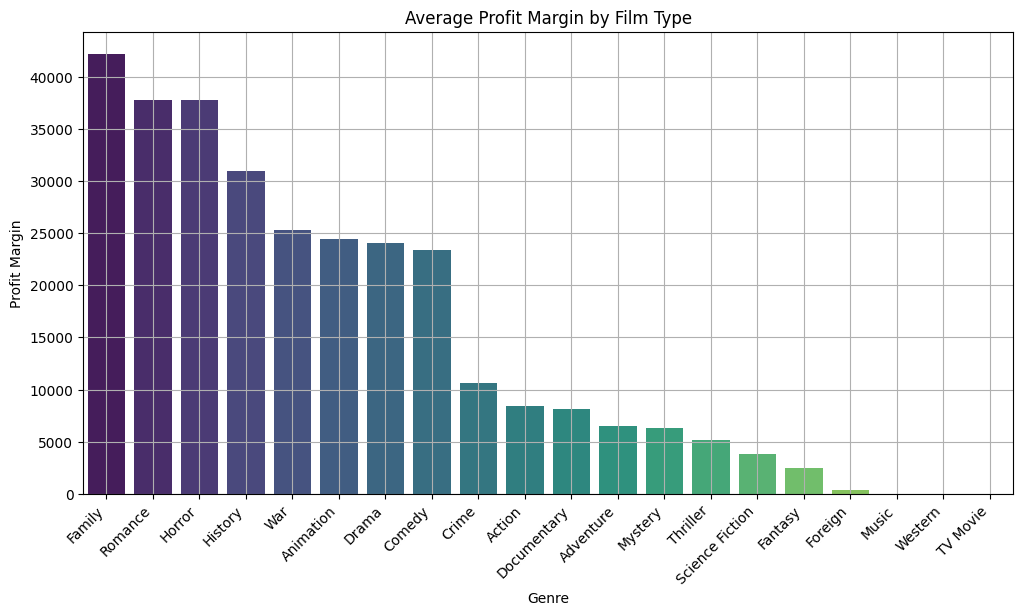

In [29]:
plot_chart("bar", genre_profit, None, None, "Average Profit Margin by Film Type", "Genre", "Profit Margin", palette="viridis")

Through the drawing we can see the result with ease and clarity, as we see that there is a great difference between the different types of films, as family, romantic and horror films achieved the highest profits. In this context, we see each type and its profits and a comparison between them.

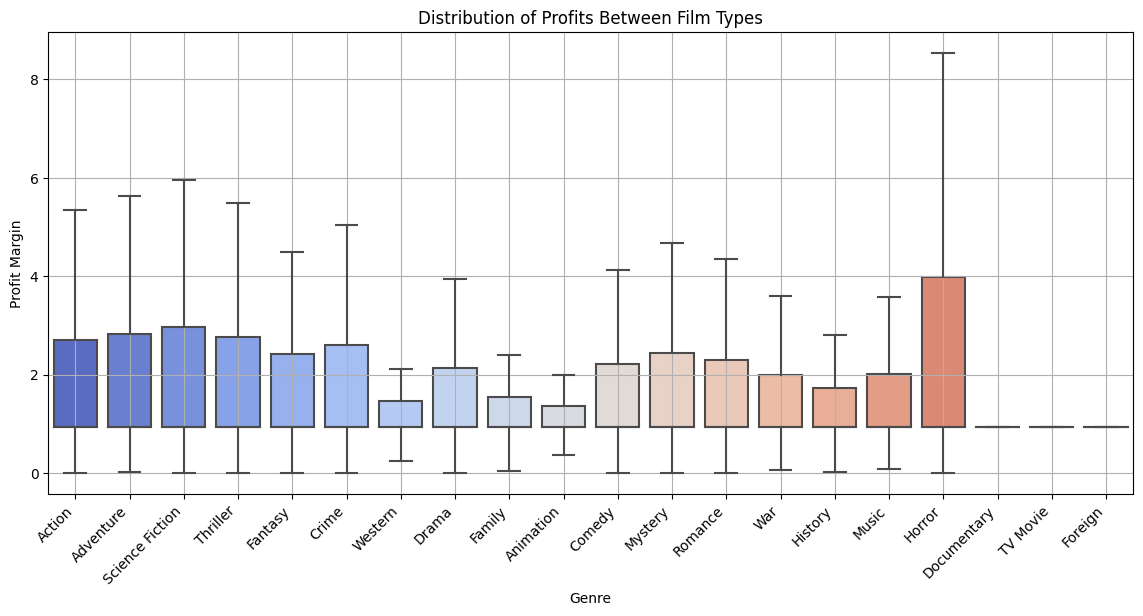

In [30]:
# Boxplot: Distribution of profits among different film genres
plot_chart("box", df_exploded, "genres", "profit_margin", "Distribution of Profits Between Film Types", "Genre", "Profit Margin", palette="coolwarm", figsize=(14, 6), showfliers=False)

Looking at the overall distribution of profits from the previous image, we find that there are types of films, such as documentaries and horror films, that contain a large variation in profits. This means that some films in these categories may achieve very high profits, while others suffer losses.

here some visualization for question 2

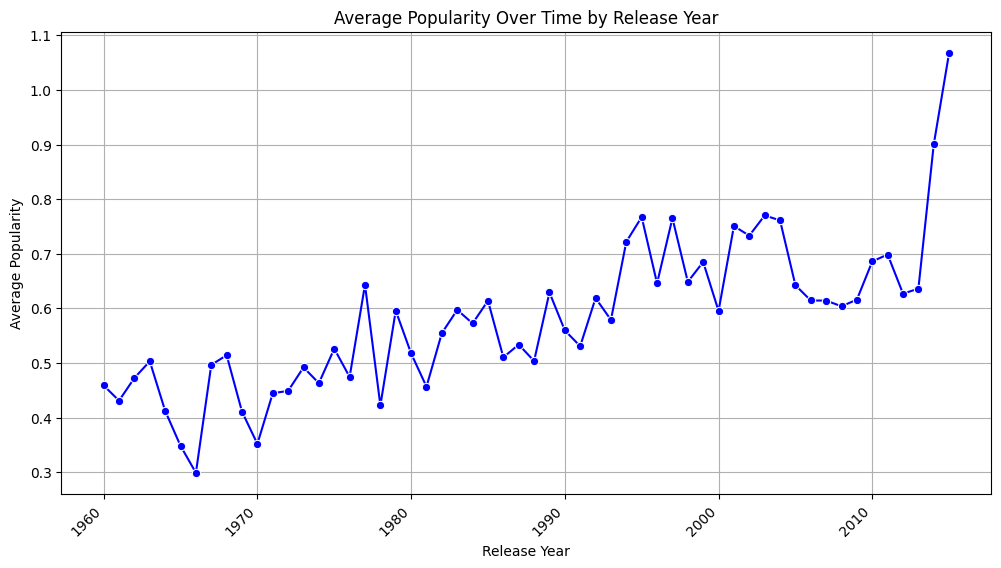

In [31]:
 # Popularity trend over release years
plot_chart("line", popularity_by_year, "release_year", "popularity", "Average Popularity Over Time by Release Year", "Release Year", "Average Popularity")

this graph shows an increase in the average popularity of films over time. In the early periods up to the 1980s, we observe fluctuations in popularity and low values. However, after the 1990s and the beginning of the new millennium, we observe a gradual increase in average popularity, which may be attributed to the significant development of the film industry, the increase in viewership, and the proliferation of various viewing platforms. We also note that popularity surged sharply in the 2010s and thereafter.

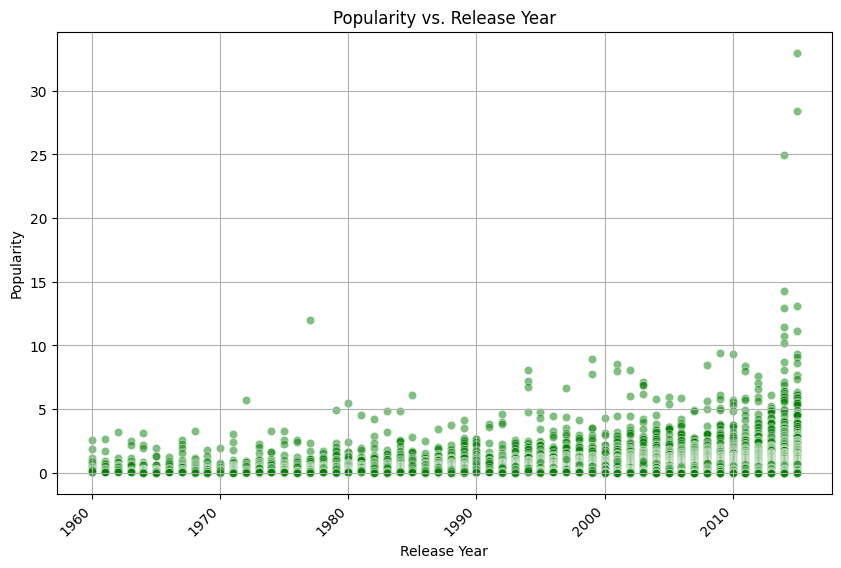

In [32]:
# Scatter plot: Relationship between popularity and release year
plot_chart("scatter", df, "release_year", "popularity", "Popularity vs. Release Year", "Release Year", "Popularity", alpha=0.5, color="green", figsize=(10, 6))

Also here we notice how popularity increased over time, especially after the 2000s, it was clearly on the rise.

# Conclusions

After our analysis, we reached several important conclusions, including:

Over the years, there has been a general increase in the popularity of films, particularly after 2000. There was a noticeable increase in 2014-2015, with average popularity rates gradually climbing. This indicates an increase in the popularity of films in the modern era.

There were some genres that achieved higher average grossing rates, such as family, romance, and horror. In contrast, genres such as television movies, musicals, and westerns achieved lower grossing rates.

# Limitations

A large percentage of movies have either a revenue of 0, a budget of 0, or both of them, making it difficult to extract meaningful financial insights. Therefore, it is essential to clean and process the data before any analysis.